# Niharika Gorain (Data Science and Business Analytics Task)
# Intern at The Spark Foundation

## Prediction using Decision Tree Algorithm


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Data Reading
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.shape

(150, 6)

In [21]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [23]:
iris=iris.drop('Id',axis=1)  #removing column ID
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
#making species column more accurate by creating new column New_species
iris['New_Species'] = iris['Species'].apply(lambda x: (x.split('-')[1]))
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,New_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


In [25]:
iris=iris.drop('Species',axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,New_Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
iris['New_Species'].unique() # Displaying the different species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Data Visualization

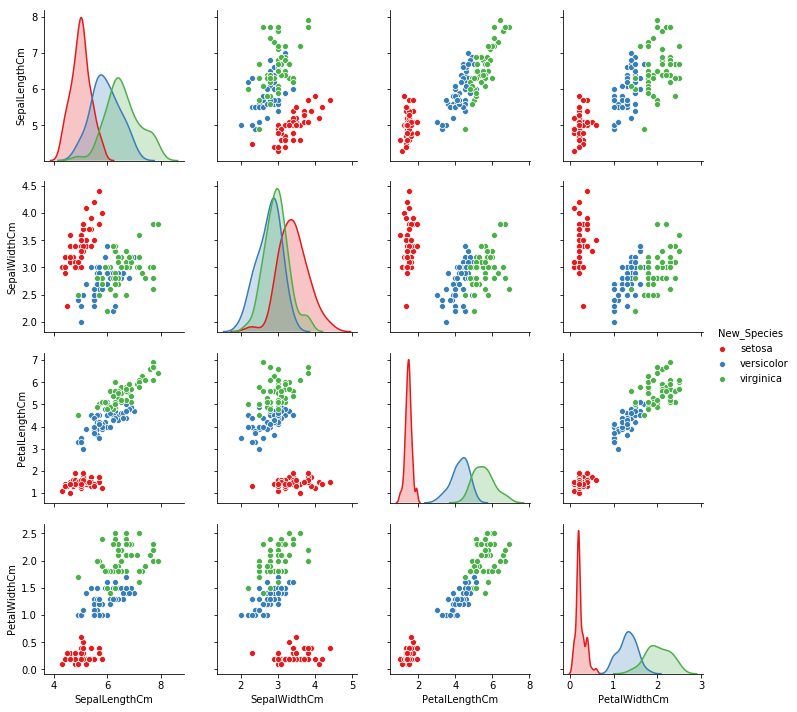

In [48]:
sns.pairplot(iris,hue='New_Species',palette='Set1')

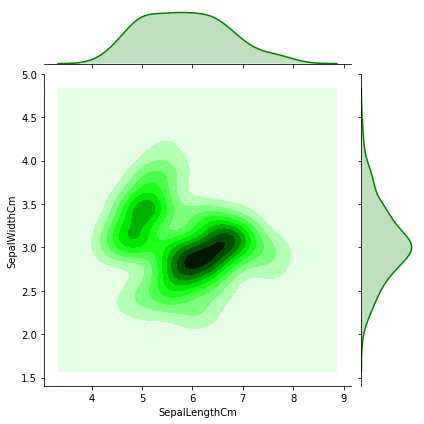

In [37]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,kind='kde',color='green')

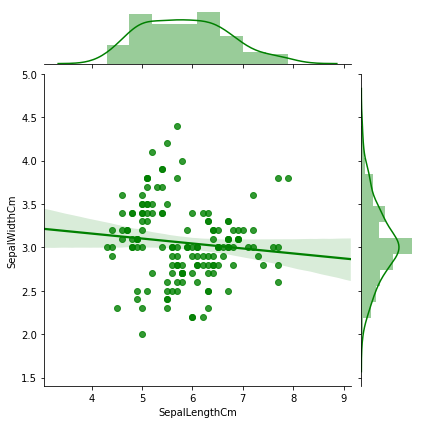

In [42]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,kind='reg',color='green')

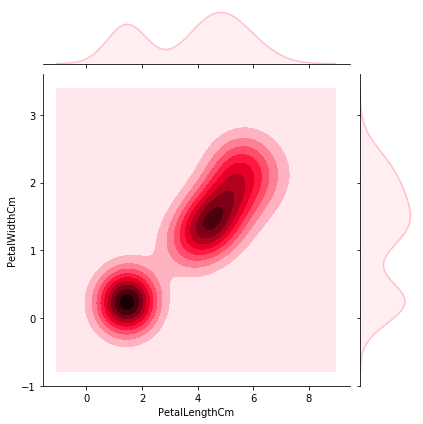

In [45]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,kind='kde',color='pink')

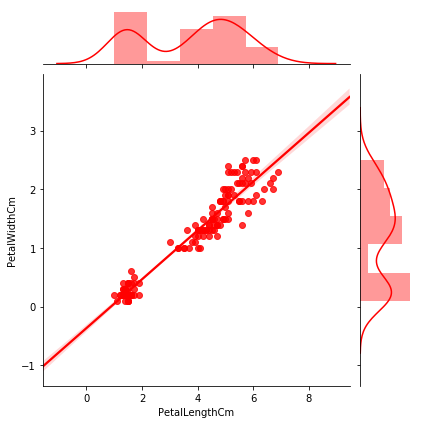

In [47]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,kind='reg',color='red')

## Data Moduling (Decision Tree Algorithm)

#### Train Test Split
Let's split up the data into a training set and a test set!

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = iris.drop('New_Species',axis=1)
y = iris['New_Species']
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
5              5.4           3.9            1.7           0.4
6              4.6           3.4            1.4           0.3
7              5.0           3.4            1.5           0.2
8              4.4           2.9            1.4           0.2
9              4.9           3.1            1.5           0.1
10             5.4           3.7            1.5           0.2
11             4.8           3.4            1.6           0.2
12             4.8           3.0            1.4           0.1
13             4.3           3.0            1.1           0.1
14             5.8           4.0            1.2           0.2
15      

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees
We'll start just by training a single decision tree.

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtree = DecisionTreeClassifier()

In [55]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation
Let's evaluate our decision tree.

In [67]:
predictions = dtree.predict(X_test)
predictions

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
type(predictions)

numpy.ndarray

In [68]:
dtree.score(X_test,y_test)

0.9555555555555556

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.89      0.94        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [78]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 14  0]
 [ 0  2 16]]


## Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library.

importing required liberaries:-

In [63]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [65]:
features = list(iris.columns[1:])
features

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'New_Species']

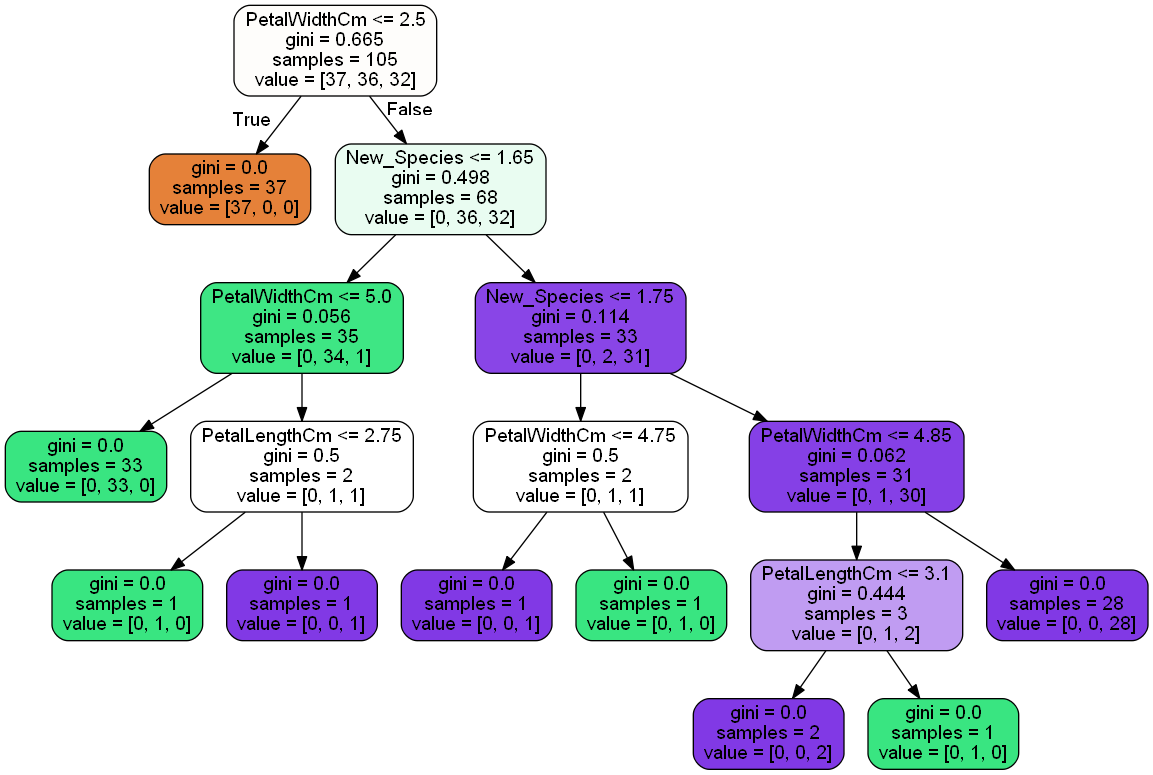

In [66]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [70]:
dtree.predict([[7,1,4,2]]) #testing

array(['virginica'], dtype=object)

In [76]:
dtree.predict([[1,7,3,1]]) #testing

array(['versicolor'], dtype=object)